***
# DDX56 Expression in GNS Lines

**Laura Richards**  
**Pugh Lab**  
**October 2017**  


Contact Info: lauram.richards@mail.utoronto.ca  
Collaborator: Pearson Lab (SickKids)  

*** 
## 1.0 Sample Cohort
***

|Sample|Patient ID|Tumour Info|Number of Cells|Details|
|-----|-----|
|G523_L|G523|Adult GBM|4,189|Adherant Line|
|G549_L|G549|Adult GBM|3,809|Adherant Line|
|G566_L|G566|Adult GBM|2,252|Adherant Line|
|G583_L|G583|Adult GBM|4,046|Adherant Line|
|G729_L|G729|Adult GBM|3,127|Adherant Line|
|G620_L|G620|Adult GBM|3,279|Adherant Line|
|G564_L|G564|Adult GBM|4,089|Adherant Line|
|G607_L|G607|Low grade glioma|2,563|Adherant Line|
|G637_L|G637|Adult GBM|3,680|Adherant Line|
|G800_L|G800|Adult GBM|3,539|Adherant Line|
|BT67_L_V|BT67|Adult GBM|2,002|Sphere Line treated with DMSO|
|BT67_L_T|BT67|Adult GBM|2,915|Sphere Line treated with inhibitor|
|BT89_L_V|BT89|Adult GBM|3,294|Sphere Line treated with DMSO|
|BT89_L_T|BT89|Adult GBM|2,985|Sphere Line treated with inhibitor|


*This info is taken from summary html file output from CellRanger and offers only a preliminary look at the data*

**14 patient-derived GNS lines totalling 45,769 cells**

In [4]:
suppressMessages(library(Seurat))
suppressMessages(library(RColorBrewer))
suppressMessages(library(viridis))
suppressMessages(library(ggplot2))
suppressMessages(library(ggbeeswarm))
suppressMessages(library(gridExtra))
suppressMessages(library(sm))
suppressMessages(library(scater))
suppressMessages(library(ggExtra))
suppressMessages(library(Matrix))
suppressMessages(library(scran))
suppressMessages(library(plyr))

In [2]:
#load("~/Documents/Analysis/PatientDerived_BTSCs_scRNA-seq_July2017/BTSCs_stdSeurat.Robj")

load("~/Desktop/BTSCs_stdSeurat.Robj")

*** 
## 2.0  DDX56 and SOX2 Expression in GNS Lines
***

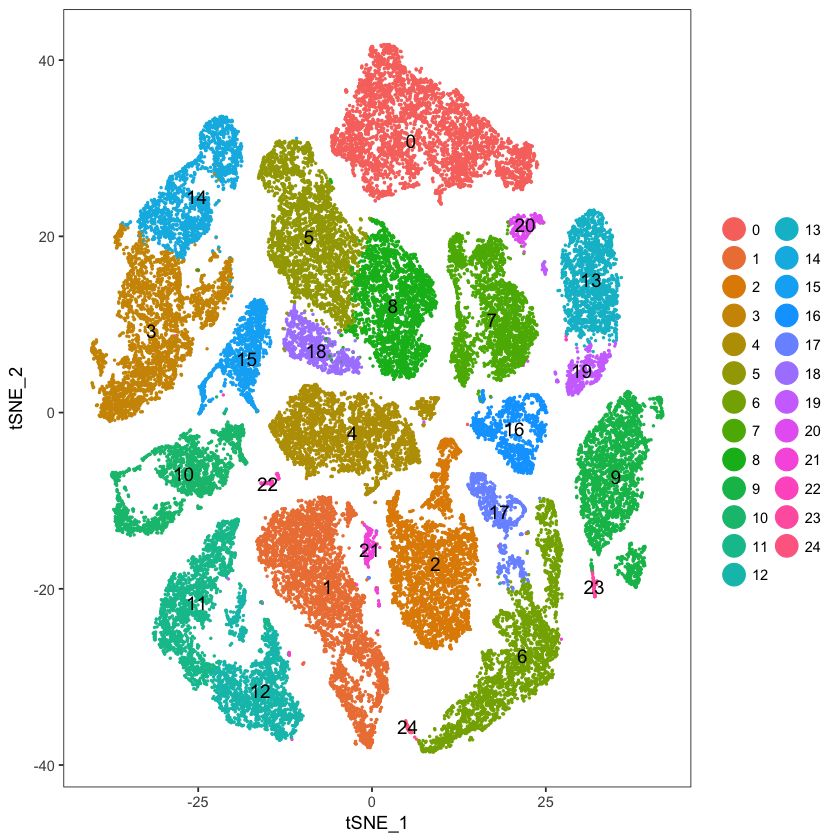

In [5]:
TSNEPlot(object = BTSC_seurat, pt.size = 0.3, do.label = T)

**Figure 1.** tSNE plot of 14 different samples, totalling >45k cells. Each dot represents a cell. Cells are coloured by transcriptional cluster. 

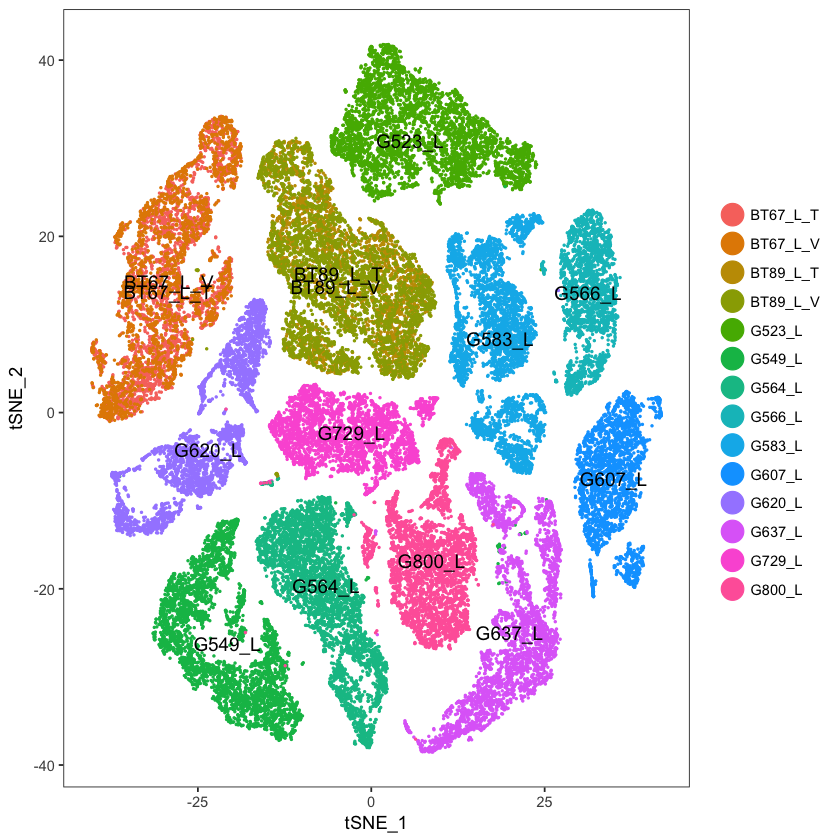

In [6]:
TSNEPlot(object = BTSC_seurat, pt.size = 0.3, group.by = "Sample.ID", do.label = T) 

**Figure 2.** tSNE plot of 14 different samples, totalling >45k cells. Each dot represents a cell. Cells are coloured by Sample ID. 

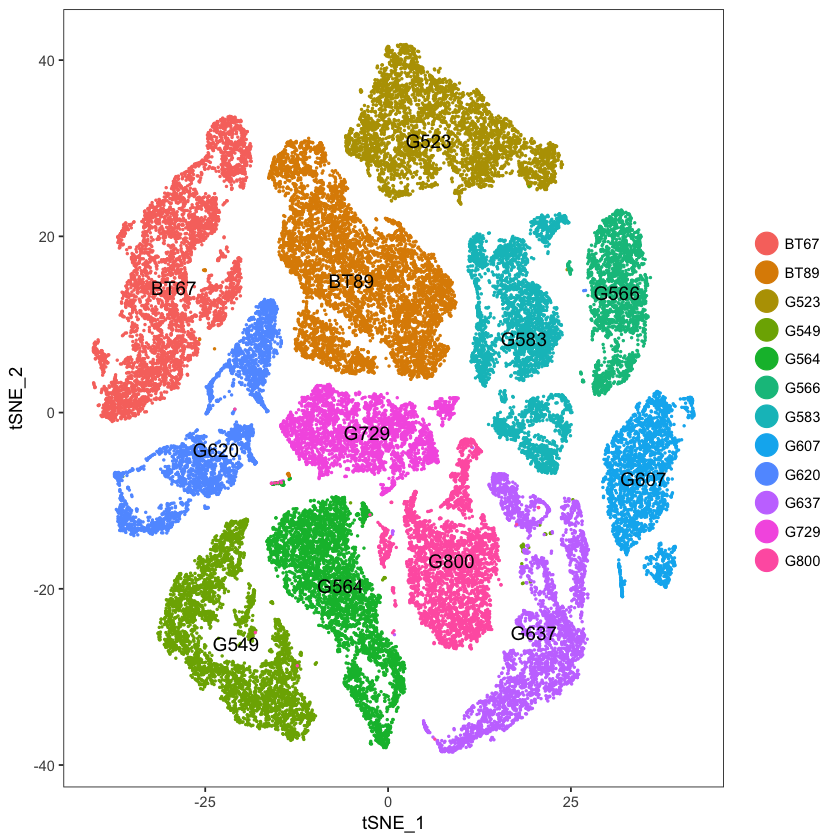

In [26]:
TSNEPlot(object = BTSC_seurat, pt.size = 0.3, group.by = "Patient.ID", do.label = T) 

**Figure 3.** **Figure 2.** tSNE plot of 14 different samples, totalling >45k cells. Each dot represents a cell. Cells are coloured by Patient ID. 

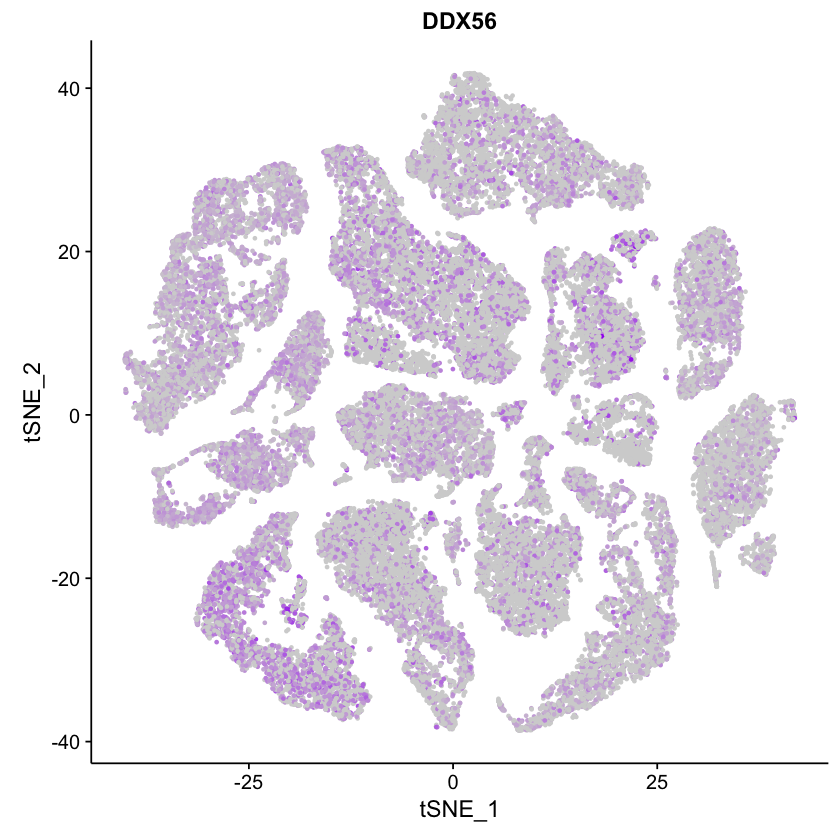

In [3]:
FeaturePlot(object = BTSC_seurat, features.plot = "DDX56", reduction.use = "tsne", cols.use = c("lightgrey", "purple"))

**Figure 4.** tSNE plot of 14 different samples, totalling >45k cells. Each dot represents a cell. Cells are coloured by DDX56 expression. Purple means high expression, while grey mean low/absent.

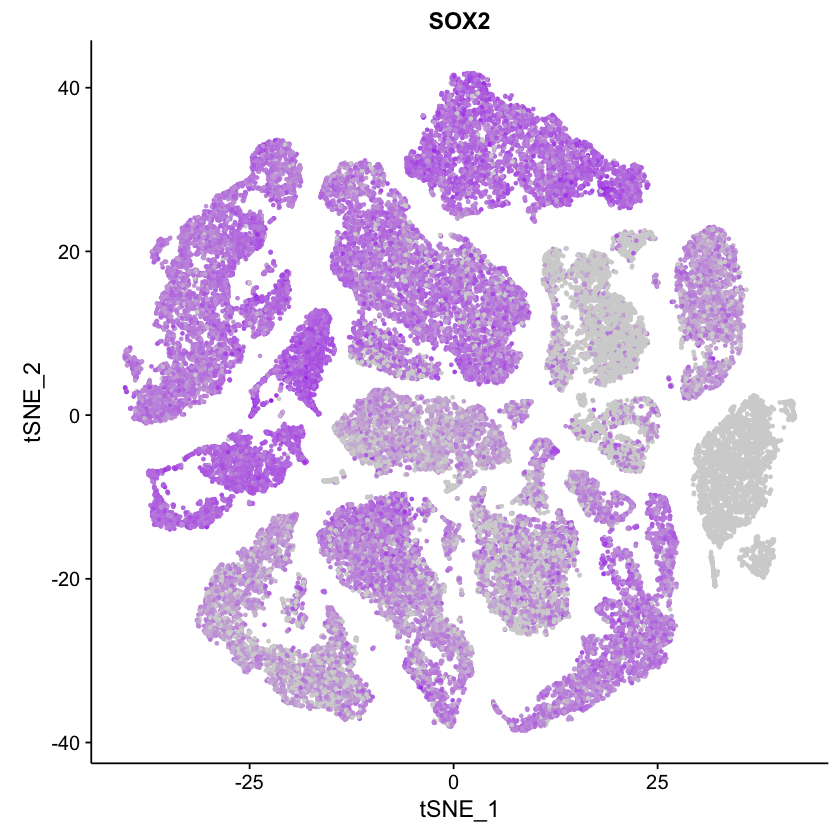

In [27]:
FeaturePlot(object = BTSC_seurat, features.plot = "SOX2", reduction.use = "tsne", cols.use = c("lightgrey", "purple"))

**Figure 5.** tSNE plot of 14 different samples, totalling >45k cells. Each dot represents a cell. Cells are coloured by SOX2 expression. Purple means high expression, while grey mean low/absent.

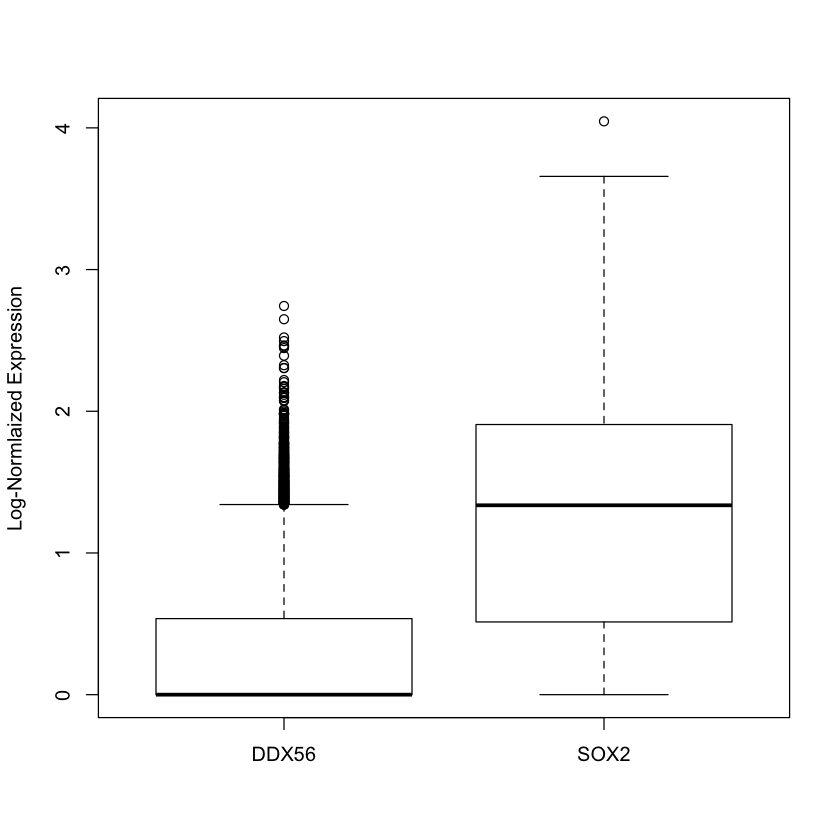

In [83]:
DDX56 <- BTSC_seurat@data[rownames(BTSC_seurat@data) == "DDX56", ]
SOX2 <- BTSC_seurat@data[rownames(BTSC_seurat@data) == "SOX2", ]

boxplot(DDX56, SOX2,
        names = c("DDX56", "SOX2"),
        ylab = c("Log-Normlaized Expression"))

**Figure 6.** DDX56 and SOX2 expression in all cells across the 14 cell lines. 

In [87]:
gene.data <- data.frame(cbind(DDX56, SOX2))
gene.data$Patient <- as.factor(BTSC_seurat@meta.data$Patient.ID)
gene.data$Sample <- as.factor(BTSC_seurat@meta.data$Sample.ID)
#head(gene.data)

In [88]:
DDX56s <- ggplot(gene.data, aes(x=Patient, y=DDX56, color = Sample)) + 
     geom_boxplot(notch = TRUE, outlier.shape = NA) + 
     geom_jitter(shape=16, position=position_jitter(0.4), alpha = 0.03, color = "grey") + 
     labs(x = "", y = 'Normalized log-Expression', title = "DDX56", color = "Sample ID") + 
     theme(axis.text = element_text(size = 10), axis.title = element_text(size = 10), text = element_text(size = 10))

SOX2s <- ggplot(gene.data, aes(x=Patient, y=SOX2, color = Sample)) + 
     geom_boxplot(notch = TRUE, outlier.shape = NA) + 
     geom_jitter(shape=16, position=position_jitter(0.4), alpha = 0.03, color = "grey") + 
     labs(x = "", y = 'Normalized log-Expression', title = "SOX2", color = "Sample ID") + 
     theme(axis.text = element_text(size = 10), axis.title = element_text(size = 10), text = element_text(size = 10))

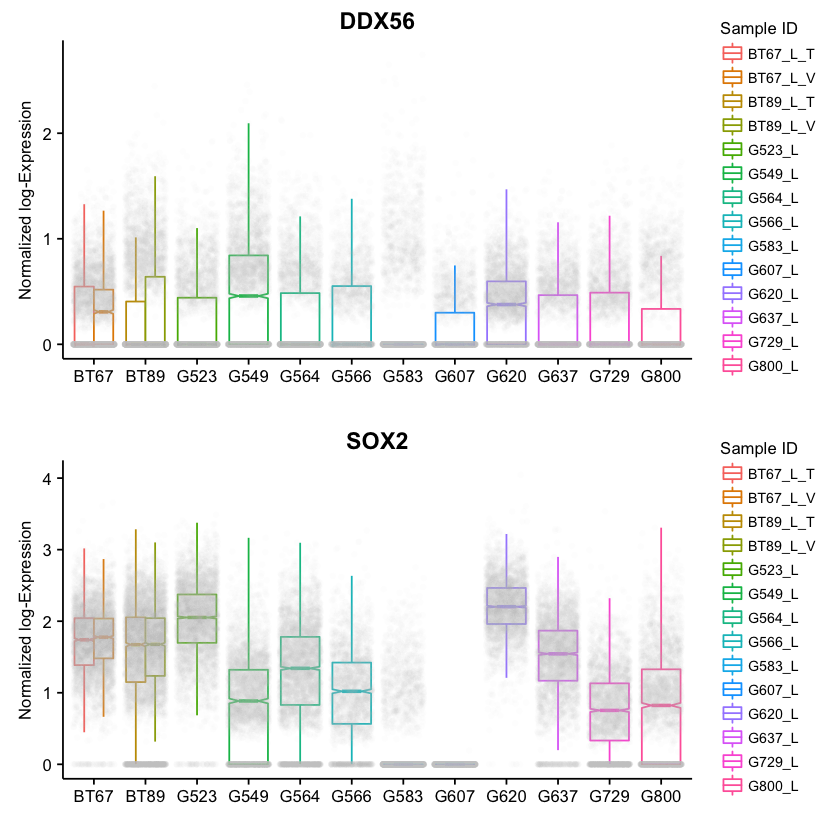

In [89]:
suppressMessages(grid.arrange(DDX56s, SOX2s, ncol =1, nrow = 2))

**Figure 7.** Boxplots showing expression of DDX56 (top) and SOX2 (bottom) for each sample. Each dot is a cell in that cell line.

In [84]:
table(DDX56 > 0 & SOX2 > 0)["TRUE"] #13,685 cells express both
table(DDX56 > 0)["TRUE"] #16,591 cells express DDX56
table(SOX2 > 0)["TRUE"] #35,105 cells express SOX2
table(DDX56 == 0 & SOX2 == 0)["TRUE"] #7,758 cells do not express either

TRUE 
13685

TRUE 
16591

TRUE 
35105

TRUE 
7758

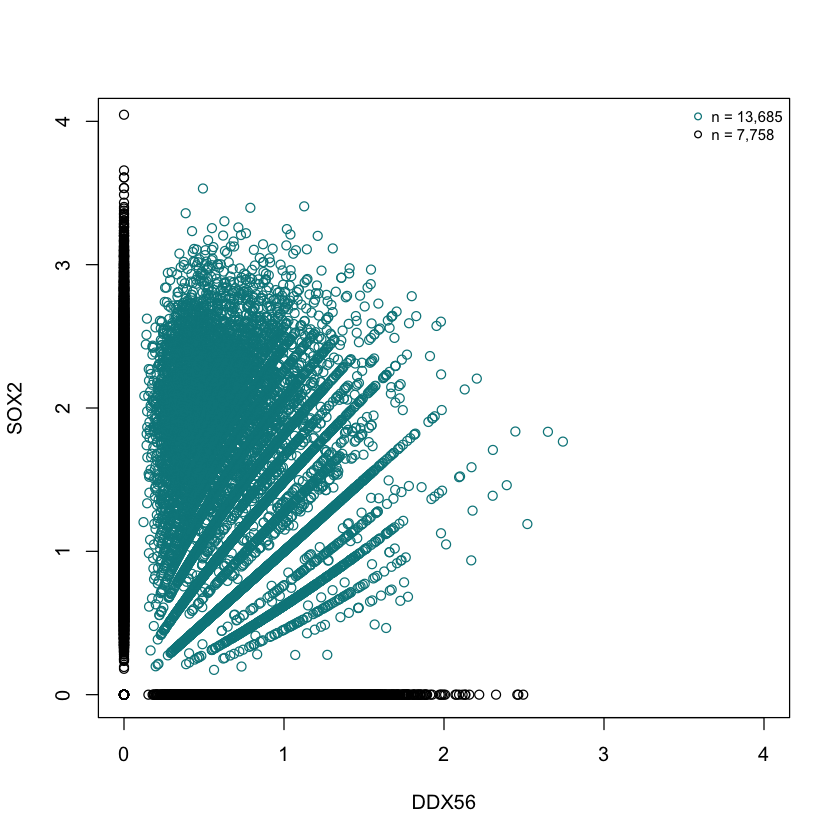

In [95]:
plot(DDX56, SOX2,
     col = ifelse(DDX56 > 0 & SOX2 >0, "turquoise4", "black"),
    ylim = c(0,4),
    xlim = c(0,4))

legend("topright", 
       c("n = 13,685", "n = 7,758"),
       col = c("turquoise4", "black"),
       pch = 1,
       bty = "n",
       cex = 0.75)


**Figure 8.** Co-expression of DDX56 and SOX2 for all cells across the 14 lines. Each dot is a cell, axes represent log-normalzied expression for gene of interest. Turquoise dots are cells that express both DDX56 and SOX2. Black dots are cells that expresson only one of the two genes. 
***